In [149]:
import pandas as pd
import cufflinks as cf
from plotly.offline import plot, iplot
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio 
import cufflinks as cf
cf.go_offline()
import plotly 
import plotly.graph_objs as go
import plotly.offline as py
import chart_studio.plotly as pyo
from datetime import datetime
from sklearn import svm
import matplotlib.pyplot as plt
#import de clusterizaçao
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#import de regreçao
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

#import de seleçao de modelos 
from sklearn.model_selection import train_test_split

#importes de pre processamneto
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn import datasets
from sklearn import metrics

In [150]:
!pip install cufflinks
!pip install plotly

<h1>manipulação e tratamento<h1\\>

In [151]:
#fazend a leitura do arquivo csv com o dataset limpo para virar nosso df 

dataset = pd.read_csv("pedido_limpo.csv", sep=',')
df=dataset

In [152]:
#exibindo as informações gerais do dataset
df

,id,id_caixa,status,data,fechamento,id_cliente,id_mesa,id_usuario,subtotal,taxa,desconto,total,valor_recebido,last_update,pedido_number,id_usuario_cancelamento,id_entregador,troco_para
0,1,1,FECHADO,2016-09-08 14:54:56,2016-09-08 20:44:22,1,1,1,33,0,0,33,50,2018-07-03 16:40:52,1,0,0,0
1,2,1,FECHADO,2016-09-08 18:11:17,2016-09-08 20:45:16,1,2,1,"17,99",0,0,"17,99",20,2018-07-03 16:40:52,2,0,0,0
2,3,1,FECHADO,2016-09-08 18:43:14,2016-09-08 20:46:19,1,3,1,"23,97",0,0,"23,97",30,2018-07-03 16:40:52,3,0,0,0
3,4,1,FECHADO,2016-09-08 20:46:44,2016-09-08 20:58:17,1,1,1,"17,98",0,0,"17,98",18,2018-07-03 16:40:52,4,0,0,0
4,5,1,FECHADO,2016-09-08 20:48:55,2016-09-08 21:03:01,1,2,1,"41,97",0,0,"41,97",52,2018-07-03 16:40:52,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99997,573,FECHADO,2018-01-03 22:22:51,2018-01-04 00:58:06,1,46,21,"9,49",0,"9,49",0,0,2018-07-03 16:40:52,122,0,0,0
99996,99998,573,FECHADO,2018-01-03 22:23:52,2018-01-03 22:59:24,1,8,18,"75,93",0,0,"75,93","75,93",2018-07-03 16:40:52,123,0,0,0
99997,99999,573,FECHADO,2018-01-03 22:24:51,2018-01-04 00:35:43,13067,0,11,"47,47",0,0,"47,47","47,47",2018-07-03 16:40:52,124,0,1,0
99998,100000,573,FECHADO,2018-01-03 22:30:45,2018-01-04 00:23:06,3176,0,1,"39,47",0,0,"39,47",50,2018-07-03 16:40:52,125,0,1,50


In [153]:
#fazendo uma padronização basica dos dados da coluna subtotal

# esse primeiro serve para converter todas a virgulas em pontos as vezes ele da erro dependendo de como o dataset foi gerado e so descomentar ou comentar
df['subtotal'] = df['subtotal'].str.replace(',', '.')
#fazendo uma conversao para todos da coluna subtotal ficar em float
df['subtotal'] = df['subtotal'].astype(float).round(2)

# Imprime o DataFrame atualizado
print(df['subtotal'])

0        33.00
1        17.99
2        23.97
3        17.98
4        41.97
         ...  
99995     9.49
99996    75.93
99997    47.47
99998    39.47
99999    14.49
Name: subtotal, Length: 100000, dtype: float64


In [154]:
# converteno a coluna data para o tipo datetime pra ficar mais tranquilo de trabalhar
df['data'] = pd.to_datetime(df['data'])

In [155]:
#criando uma nova coluna chamada ano para em um proximo momento agrupar os valores por ano 

# Extrai apenas o ano da coluna 'data' e gera uma nova coluna chamada ano 
df['ano'] = df['data'].dt.strftime('%Y')

In [156]:
#criando uma nova coluna chamada dia para em um proximo momento agrupar ou manipular os valores por dia
df['dia'] = df['data'].dt.day

In [157]:
#testando nova coluna
df['ano']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
99995    2018
99996    2018
99997    2018
99998    2018
99999    2018
Name: ano, Length: 100000, dtype: object

In [158]:
#criando um df especifico para ver os dados agrupados por anos
df_agrupado_por_ano = df.groupby('ano').sum()
df_agrupado_por_ano

C:\Users\alyss\AppData\Local\Temp\ipykernel_19328\1544490520.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,id,id_caixa,id_cliente,id_mesa,id_usuario,subtotal,taxa,pedido_number,id_usuario_cancelamento,id_entregador,dia
ano,,,,,,,,,,,
2016,51177523,586153,994094,76034,14695,338005.65,0,602256,42,2015,162025
2017,4901281623,38061517,171494634,1159889,990851,2846068.57,0,10197335,15740,32038,1394285
2018,47686475,327370,1914422,5801,7309,15756.19,0,35574,75,196,1177


não foi possivel calcular o tiket medio por cliente por limitações na base de dados 

In [159]:
# a explicação é que cada venda feita e separada por um id diferente e pelo que eu acho o id numero '1' foi usado varias vezes por isso o valor alto na coluna subtotal

df_id_clientes = df.groupby('id_cliente')

soma_por_clientes = df_id_clientes.sum()

soma_por_clientes

C:\Users\alyss\AppData\Local\Temp\ipykernel_19328\1479787503.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,id,id_caixa,id_mesa,id_usuario,subtotal,taxa,pedido_number,id_usuario_cancelamento,id_entregador,dia
id_cliente,,,,,,,,,,
1,3126017989,24473489,1241724,653173,2090983.14,0,7147255,12044,21,1026087
2,10044,109,0,3,38.50,0,134,0,2,48
3,45,6,0,1,42.00,0,10,0,1,9
4,46,6,0,1,18.00,0,11,0,1,9
5,2104,37,0,2,36.00,0,19,0,2,18
...,...,...,...,...,...,...,...,...,...,...
13063,99983,573,0,11,38.98,0,108,0,1,3
13064,99987,573,0,1,21.99,0,112,0,1,3
13065,99993,573,0,1,19.99,0,118,0,1,3


<h1>normalização e padronização de alguns dados<h1\>

In [160]:
#fazendo a normalizaçao dos dados da coluna subtotal do df principal
scaler = StandardScaler()
valor_padronizado_df_pincipal = scaler.fit_transform(df["subtotal"].values.reshape(-1,1))

#adicionando esses valores em uma nova coluna no data frame

df["valores_padronizados"] = valor_padronizado_df_pincipal

#verificando a nova coluna

df["valores_padronizados"]

0        0.050656
1       -0.708406
2       -0.405995
3       -0.708912
4        0.504273
           ...   
99995   -1.138255
99996    2.221645
99997    0.782410
99998    0.377847
99999   -0.885403
Name: valores_padronizados, Length: 100000, dtype: float64

<h1>fazendo a separação dos dados por meses dos anos<h1\>

In [161]:
#criando df para cada ano pra fica mais simples de manipular
df['ano'] = pd.to_datetime(df['ano'])

# Especifique o ano desejado
ano_2017 = 2017
ano_2018 = 2018
ano_2016 = 2016

# Filtra as linhas com o ano desejado
df_2017 = df[df['ano'].dt.year == ano_2017]
df_2018 = df[df['ano'].dt.year == ano_2018]
df_2016 = df[df['ano'].dt.year == ano_2016]

In [162]:
#criando uma coluna chamada mes com os respequitivos meses da coluna data
df_2016['mes'] = df_2016['data'].dt.month
df_2017['mes'] = df_2017['data'].dt.month
df_2018['mes'] = df_2018['data'].dt.month

In [163]:
dados_por_mes_2016 = df_2016.groupby('mes')
dados_por_mes_2017 = df_2017.groupby('mes')
dados_por_mes_2018 = df_2018.groupby('mes')

In [164]:
#criando as celulas do df sepadas po mes

#               2016

# no ano de 2016 temos dados a partir do mes 9
mes_09_2016 = dados_por_mes_2016.get_group(9)
mes_10_2016 = dados_por_mes_2016.get_group(10)
mes_11_2016 = dados_por_mes_2016.get_group(11)
mes_12_2016 = dados_por_mes_2016.get_group(12)

#               2017
# no ano de 2017 temos todos os meses do ano
mes_01_2017 = dados_por_mes_2017.get_group(1)
mes_02_2017 = dados_por_mes_2017.get_group(2)
mes_03_2017 = dados_por_mes_2017.get_group(3)
mes_04_2017 = dados_por_mes_2017.get_group(4)
mes_05_2017 = dados_por_mes_2017.get_group(5)
mes_06_2017 = dados_por_mes_2017.get_group(6)
mes_07_2017 = dados_por_mes_2017.get_group(7)
mes_08_2017 = dados_por_mes_2017.get_group(8)
mes_09_2017 = dados_por_mes_2017.get_group(9)
mes_10_2017 = dados_por_mes_2017.get_group(10)
mes_11_2017 = dados_por_mes_2017.get_group(11)
mes_12_2017 = dados_por_mes_2017.get_group(12)

#              2018
# no ano de 2018 temos apenas o mes de janeiro disponivel
mes_01_2018 = dados_por_mes_2018.get_group(1)

In [165]:
#fazendo a consulta desses datas basta apenas des-comentar algum

mes_09_2016
# mes_10_2016
# mes_11_2016
# mes_12_2016

# mes_01_2017
# mes_02_2017
# mes_03_2017
# mes_04_2017
# mes_05_2017
# mes_06_2017
# mes_07_2017
# mes_08_2017
# mes_09_2017
# mes_10_2017
# mes_11_2017
# mes_12_2017

# mes_01_2018


,id,id_caixa,status,data,fechamento,id_cliente,id_mesa,id_usuario,subtotal,taxa,...,valor_recebido,last_update,pedido_number,id_usuario_cancelamento,id_entregador,troco_para,ano,dia,valores_padronizados,mes
0,1,1,FECHADO,2016-09-08 14:54:56,2016-09-08 20:44:22,1,1,1,33.00,0,...,50,2018-07-03 16:40:52,1,0,0,0,2016-01-01,8,0.050656,9
1,2,1,FECHADO,2016-09-08 18:11:17,2016-09-08 20:45:16,1,2,1,17.99,0,...,20,2018-07-03 16:40:52,2,0,0,0,2016-01-01,8,-0.708406,9
2,3,1,FECHADO,2016-09-08 18:43:14,2016-09-08 20:46:19,1,3,1,23.97,0,...,30,2018-07-03 16:40:52,3,0,0,0,2016-01-01,8,-0.405995,9
3,4,1,FECHADO,2016-09-08 20:46:44,2016-09-08 20:58:17,1,1,1,17.98,0,...,18,2018-07-03 16:40:52,4,0,0,0,2016-01-01,8,-0.708912,9
4,5,1,FECHADO,2016-09-08 20:48:55,2016-09-08 21:03:01,1,2,1,41.97,0,...,52,2018-07-03 16:40:52,5,0,0,0,2016-01-01,8,0.504273,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,24,FECHADO,2016-09-30 23:35:26,2016-09-30 23:57:45,1,5,1,82.00,0,...,100,2018-07-03 16:40:52,83,0,0,0,2016-01-01,30,2.528608,9
1458,1459,24,FECHADO,2016-09-30 23:39:57,2016-09-30 23:42:04,1,15,1,28.50,0,...,30,2018-07-03 16:40:52,84,0,0,0,2016-01-01,30,-0.176911,9
1459,1460,24,FECHADO,2016-09-30 23:44:39,2016-10-01 00:05:33,1,10,1,25.00,0,...,50,2018-07-03 16:40:52,85,0,0,0,2016-01-01,30,-0.353907,9
1460,1461,24,FECHADO,2016-09-30 23:50:23,2016-10-01 00:19:12,1,2,1,64.00,0,...,100,2018-07-03 16:40:52,86,0,0,0,2016-01-01,30,1.618340,9


<h1>regressao linear<h1\>

In [ ]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes['dia'].values.reshape(-1,1)
Y = mes['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_da_previsao['dia'])
previsao = modelo.predict(X_novo) # aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_09_2016['dia'].values.reshape(-1,1)
Y = mes_09_2016['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_10_2016['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[28.83367297 28.83367297 28.83367297 ... 30.0155226  30.0155226
 30.0155226 ]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [167]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao                    # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.03939498753680542
Interceptação: 28.794277982580734
MSE: 2.2668070337264078e-30


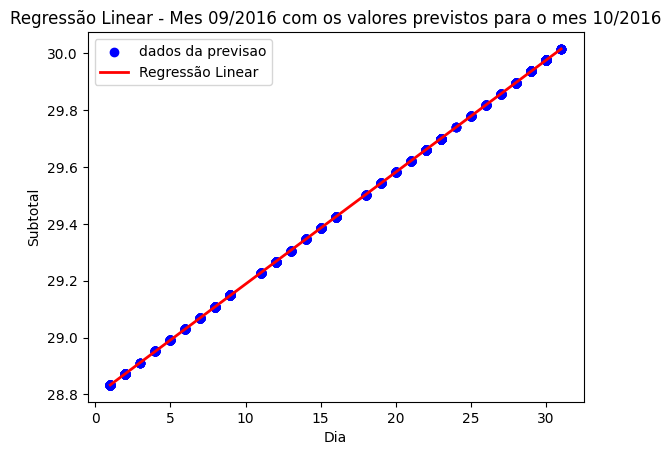

In [168]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 09/2016 com os valores previstos para o mes 10/2016')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [169]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_10_2016['dia'].values.reshape(-1,1)
Y = mes_10_2016['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_11_2016['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[32.4771694  32.4771694  32.4771694  ... 34.50735052 34.50735052
 34.50735052]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [170]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao                    # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.07000624547955013
Interceptação: 32.40716315574991
MSE: 7.86148585447843e-29


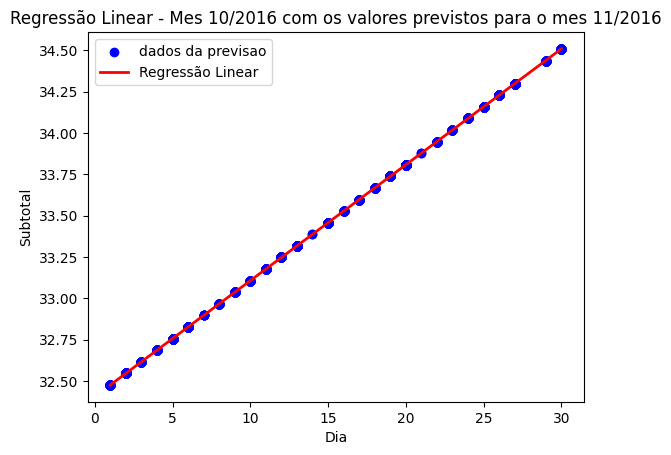

In [171]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 10/2016 com os valores previstos para o mes 11/2016')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [172]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_11_2016['dia'].values.reshape(-1,1)
Y = mes_11_2016['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_12_2016['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[33.11641769 33.11641769 33.11641769 ... 35.35660739 35.35660739
 35.35660739]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [173]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.07467299004407188
Interceptação: 33.04174469822831
MSE: 1.420244530670801e-29


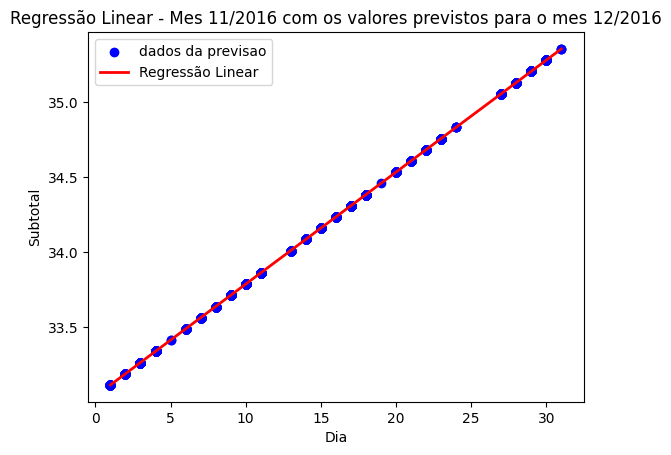

In [174]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 11/2016 com os valores previstos para o mes 12/2016')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [175]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_12_2016['dia'].values.reshape(-1,1)
Y = mes_12_2016['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_01_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[34.93637604 34.93637604 34.93637604 ... 33.60916796 33.60916796
 33.60916796]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [176]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.047400288729638244
Interceptação: 35.078576906332486
MSE: 3.482486374754454e-29


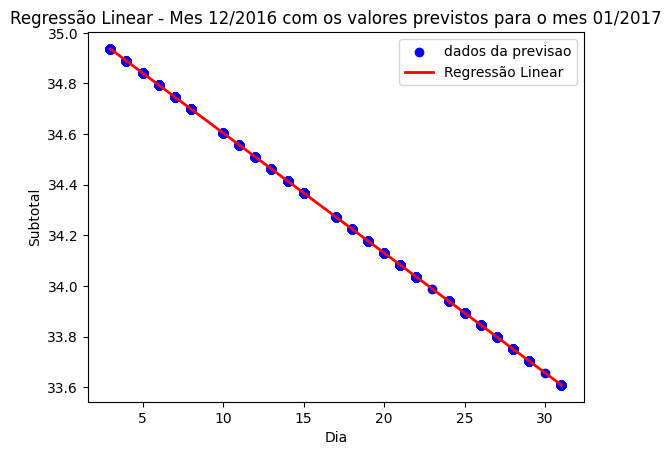

In [177]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 12/2016 com os valores previstos para o mes 01/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [178]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_01_2017['dia'].values.reshape(-1,1)
Y = mes_01_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_02_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[35.09752387 35.09752387 35.09752387 ... 34.30689265 34.30689265
 34.30689265]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [179]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.03437527062047781
Interceptação: 35.13189914327539
MSE: 0.0


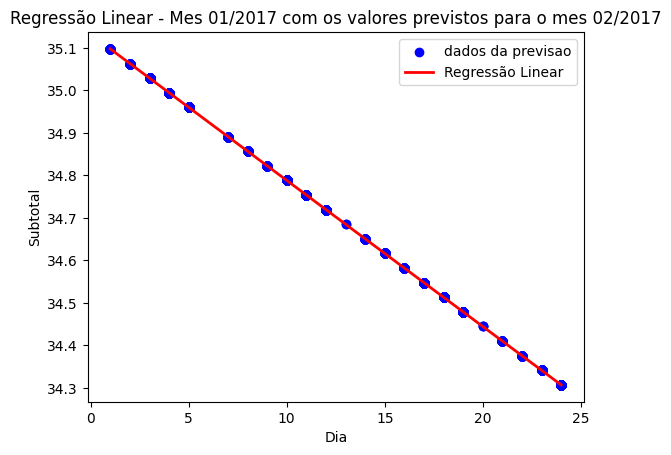

In [180]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 01/2017 com os valores previstos para o mes 02/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [181]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_02_2017['dia'].values.reshape(-1,1)
Y = mes_02_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_03_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[36.01128264 36.01128264 36.01128264 ... 34.26363577 34.26363577
 34.26363577]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [182]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.05825489561217465
Interceptação: 36.069537538482116
MSE: 1.504785765677064e-29


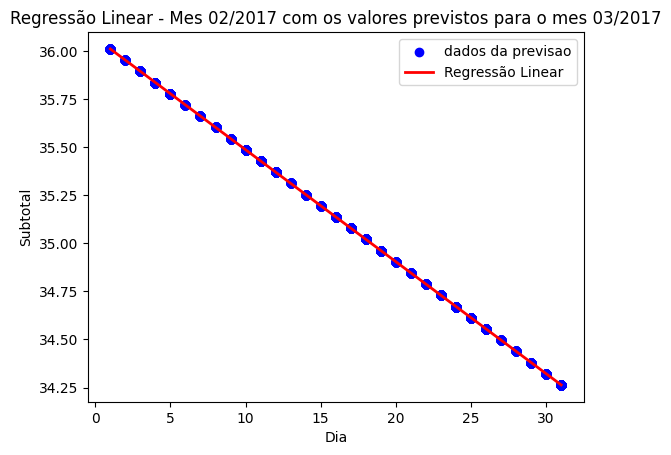

In [183]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 02/2017 com os valores previstos para o mes 03/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [184]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_03_2017['dia'].values.reshape(-1,1)
Y = mes_03_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_04_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[34.84603275 34.84603275 34.84603275 ... 31.79407053 31.79407053
 31.79407053]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [185]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.1052400767854306
Interceptação: 34.95127282969423
MSE: 1.1518368854524223e-28


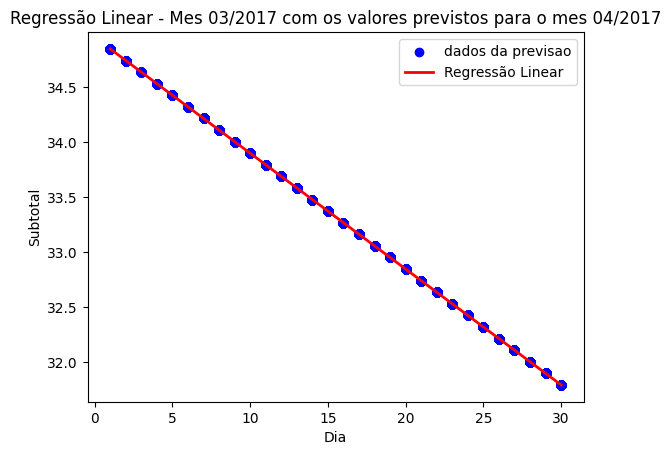

In [186]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 03/2017 com os valores previstos para o mes 04/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [187]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_04_2017['dia'].values.reshape(-1,1)
Y = mes_04_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_05_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[33.40467785 33.40467785 33.40467785 ... 30.6845774  30.6845774
 30.6845774 ]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [188]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.09067001504601215
Interceptação: 33.49534786786746
MSE: 2.7785574716199326e-29


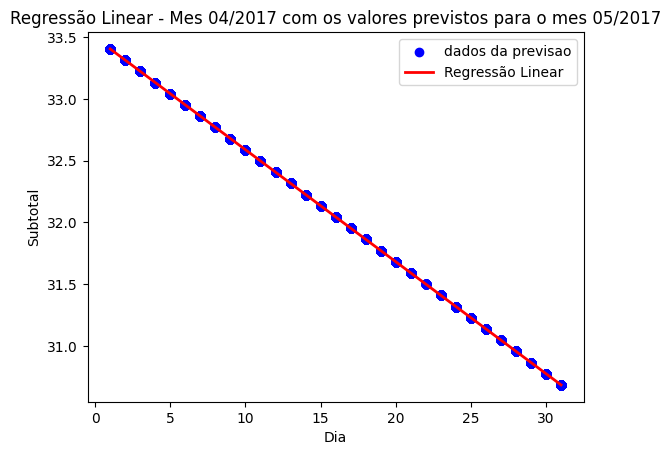

In [189]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 04/2017 com os valores previstos para o mes 05/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [190]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_05_2017['dia'].values.reshape(-1,1)
Y = mes_05_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_06_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[30.40404729 30.40404729 30.40404729 ... 30.36643373 30.36643373
 30.36643373]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [191]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.0012970190158620367
Interceptação: 30.40534430529761
MSE: 4.068686939331918e-31


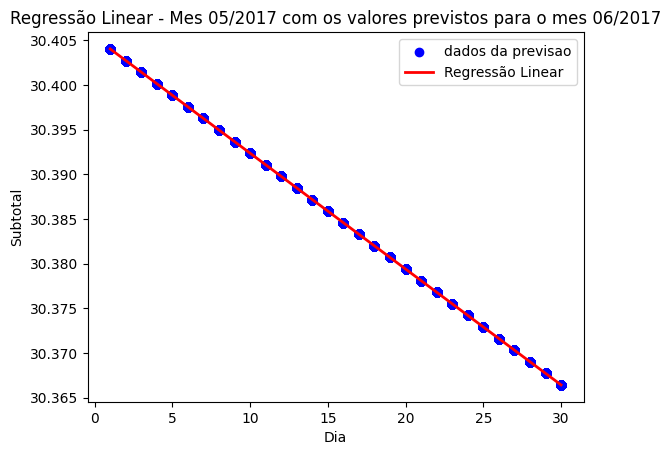

In [192]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 05/2017 com os valores previstos para o mes 06/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [193]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_06_2017['dia'].values.reshape(-1,1)
Y = mes_06_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_07_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[31.98250136 31.98250136 31.98250136 ... 35.36296843 35.36296843
 35.36296843]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [194]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.11268223590143973
Interceptação: 31.869819120225998
MSE: 2.9971996733864875e-29


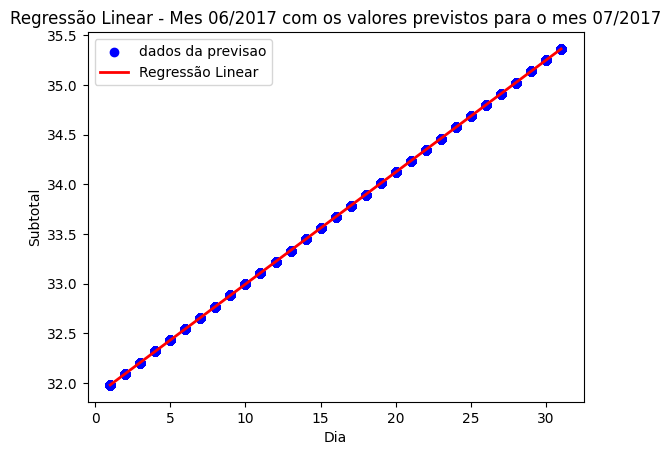

In [195]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 06/2017 com os valores previstos para o mes 07/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [196]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_07_2017['dia'].values.reshape(-1,1)
Y = mes_07_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_08_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[32.29542614 32.29542614 32.29542614 ... 31.82611538 31.82611538
 31.82611538]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [197]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.015643692160761002
Interceptação: 32.31106983234488
MSE: 2.7472713691311954e-30


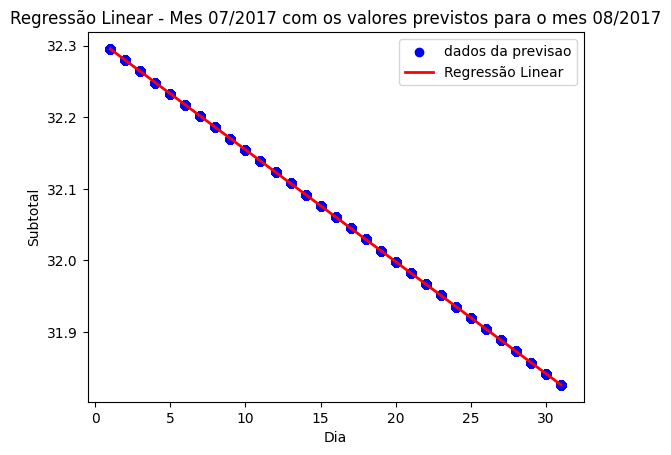

In [198]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 07/2017 com os valores previstos para o mes 08/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [199]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_08_2017['dia'].values.reshape(-1,1)
Y = mes_08_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_09_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[31.62917606 31.62917606 31.62917606 ... 30.11076675 30.11076675
 30.11076675]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [200]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.052358941657702086
Interceptação: 31.68153499694558
MSE: 4.1109408852253644e-29


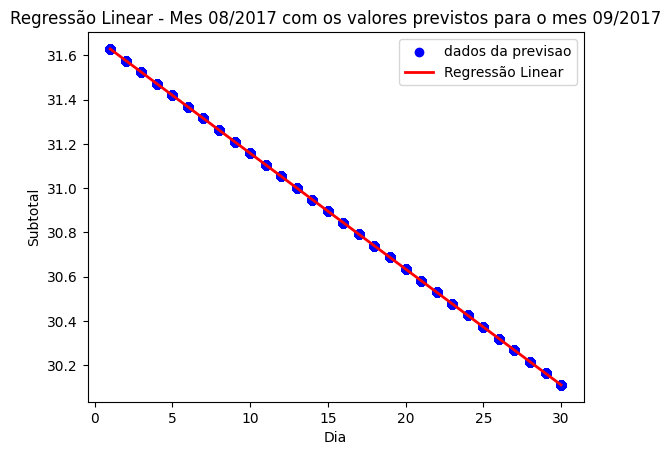

In [201]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 08/2017 com os valores previstos para o mes 09/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [202]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_09_2017['dia'].values.reshape(-1,1)
Y = mes_09_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_10_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[30.44448585 30.44448585 30.44448585 ... 31.37114025 31.37114025
 31.37114025]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [203]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.030888479861905557
Interceptação: 30.41359737245265
MSE: 5.0714785909365854e-30


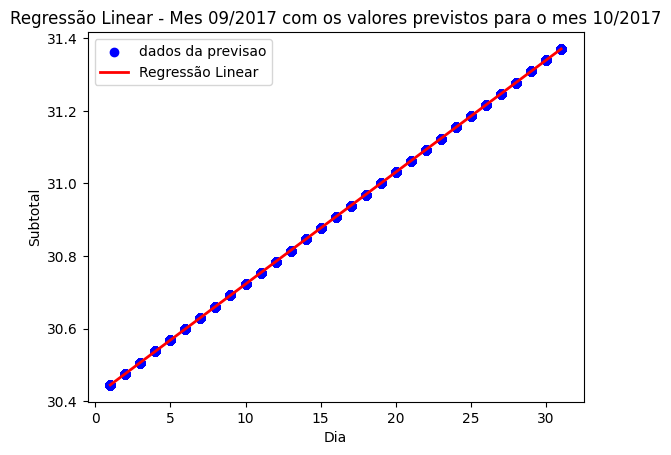

In [204]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 09/2017 com os valores previstos para o mes 10/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [205]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_10_2017['dia'].values.reshape(-1,1)
Y = mes_10_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_11_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[30.3686307  30.3686307  30.3686307  ... 30.81869662 30.81869662
 30.81869662]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [206]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.015519514537036979
Interceptação: 30.35311118484127
MSE: 1.2050401681647077e-29


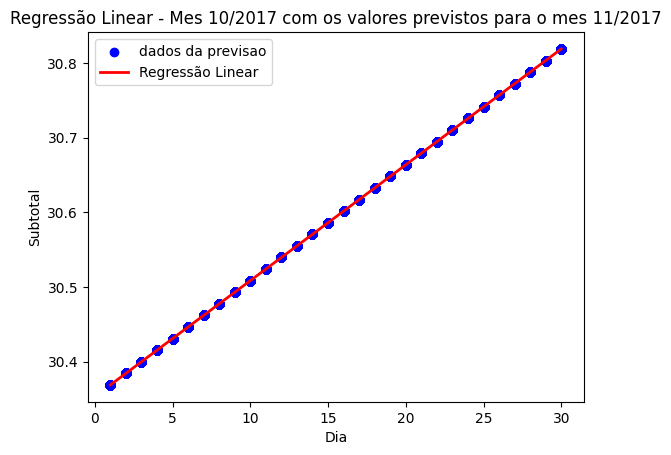

In [207]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 10/2017 com os valores previstos para o mes 11/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [208]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_11_2017['dia'].values.reshape(-1,1)
Y = mes_11_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_12_2017['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[31.60836855 31.60836855 31.60836855 ... 30.11920952 30.11920952
 30.11920952]


c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [209]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: -0.04963863426007075
Interceptação: 31.65800718061012
MSE: 2.2914947794882374e-29


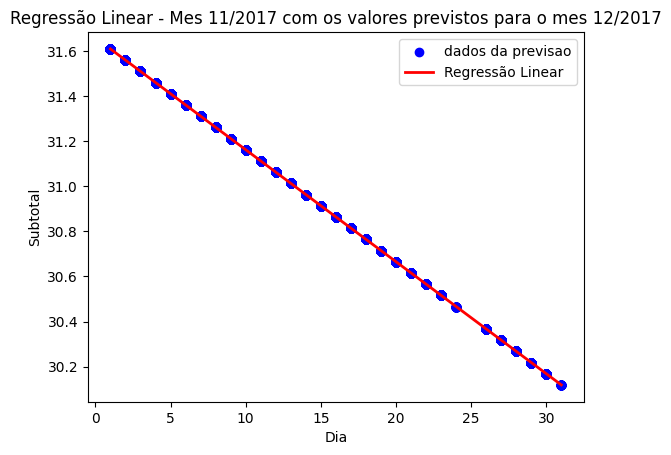

In [210]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 11/2017 com os valores previstos para o mes 12/2017')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [211]:
# Separar as variáveis independentes (dia) e a variável dependente (subtotal)
X = mes_12_2017['dia'].values.reshape(-1,1)
Y = mes_12_2017['subtotal']

# Criar e ajustar um modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, Y)

# Fazer previsões com base no modelo ajustado
X_novo = pd.DataFrame(mes_01_2018['dia'])
previsao = modelo.predict(X_novo)# aqui no caso novos subtotais

# Exibir as previsões
print(previsao)

[30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407 30.78950407
 30.78950407 30.78950407 30.78950407 30.78950407 30

c:\Users\alyss\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [219]:
# Definir as variáveis independentes e dependentes
X = X_novo  # Coluna de data como variável independente
y = previsao # Coluna de subtotal como variável dependente

# Ajustar o modelo aos dados
modelo.fit(X, y)

# Realizar previsões
y_pred = modelo.predict(X)

# Imprimir os resultados
print("Coeficiente:", modelo.coef_[0])
print("Interceptação:", modelo.intercept_)
print("MSE:", mean_squared_error(y, y_pred))

Coeficiente: 0.07482888931304996
Interceptação: 30.639846295886027
MSE: 5.048709793414476e-29


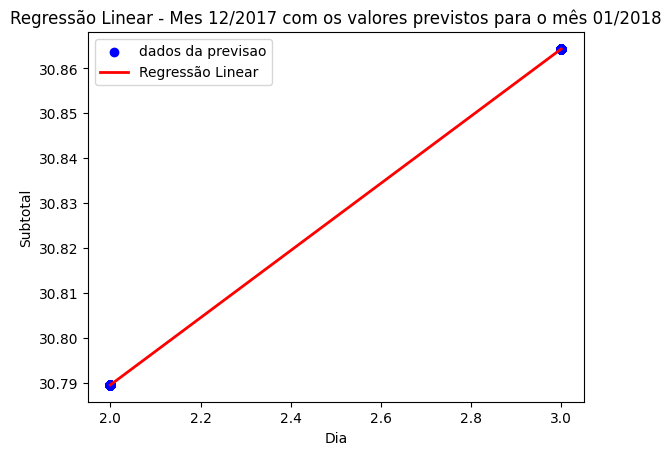

In [221]:
# Plotar o gráfico de dispersão dos dados originais
plt.scatter(X, y, color='blue', label='dados da previsao')

# Plotar a linha da regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regressão Linear')

# Definir rótulos e título do gráfico
plt.xlabel('Dia')
plt.ylabel('Subtotal')
plt.title('Regressão Linear - Mes 12/2017 com os valores previstos para o mês 01/2018')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()



#nesse grafico so tivemos dois pontos pois pelo que parece no dataset so temos 2 dias o dia 2 e 3 no mes 01 de 2018

In [ ]:
# como explicado no comentatario da ultima celula -- --

mes_01_2018['dia'].values 

#temos a saida que era esperada apenas 2 dias por sinal esse o o nosso limite do data set sendo assim nao e possivel fazer a previsao da,
#linha de regressão para o mês subsequente 